<a href="https://colab.research.google.com/github/perinai/AITool_Assigment/blob/main/AITool_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # Though not strictly needed for Iris target
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target) # Target is already numeric (0, 1, 2)

print("Dataset loaded.")
print("Features (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())
print("\nTarget names (species):")
print(iris.target_names)

Dataset loaded.
Features (X) head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target (y) head:
0    0
1    0
2    0
3    0
4    0
dtype: int64

Target names (species):
['setosa' 'versicolor' 'virginica']


In [3]:
# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())

# The Iris dataset is clean and target is numeric, so no explicit encoding needed.
# If target was string labels like ['setosa', 'versicolor', 'virginica'],
# you would use LabelEncoder:
# le = LabelEncoder()
# y_encoded = le.fit_transform(y_string_labels)
# For this dataset, y is already 0, 1, 2.

print("\nData preprocessing check complete (Iris is typically clean).")

Missing values in X:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Data preprocessing check complete (Iris is typically clean).


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Data split into training and testing sets.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data split into training and testing sets.
X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


In [5]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier trained.")

Decision Tree Classifier trained.


In [6]:
y_pred = dt_classifier.predict(X_test)

print("Predictions made on the test set.")
print("First 5 predictions:", y_pred[:5])
print("First 5 actual labels:", y_test.values[:5])

Predictions made on the test set.
First 5 predictions: [2 1 2 2 2]
First 5 actual labels: [2 1 2 1 2]


Accuracy: 0.9333
Precision (weighted): 0.9444
Recall (weighted): 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45


Confusion Matrix:
[[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


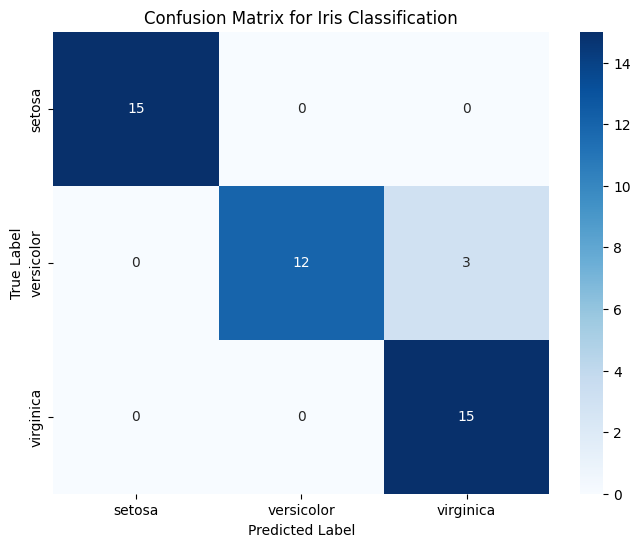

In [7]:
accuracy = accuracy_score(y_test, y_pred)
# For multi-class, specify average for precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show() # This will display the plot in Colab

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow version: {tf.__version__}")
print("Libraries for MNIST task imported.")

TensorFlow version: 2.18.0
Libraries for MNIST task imported.


In [9]:
# Load MNIST dataset
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

print("MNIST dataset loaded.")
print("X_train_mnist shape (before processing):", X_train_mnist.shape)

# Normalize pixel values to be between 0 and 1
X_train_mnist = X_train_mnist.astype('float32') / 255.0
X_test_mnist = X_test_mnist.astype('float32') / 255.0

# Reshape data for CNN (add channel dimension: 1 for grayscale)
# CNN expects (num_samples, height, width, channels)
X_train_mnist = X_train_mnist.reshape((-1, 28, 28, 1))
X_test_mnist = X_test_mnist.reshape((-1, 28, 28, 1))

print("X_train_mnist shape (after reshape for CNN):", X_train_mnist.shape)

# One-hot encode target labels (e.g., 5 -> [0,0,0,0,0,1,0,0,0,0])
y_train_mnist_cat = to_categorical(y_train_mnist, num_classes=10)
y_test_mnist_cat = to_categorical(y_test_mnist, num_classes=10)

print("y_train_mnist_cat shape (after one-hot encoding):", y_train_mnist_cat.shape)
print("Sample original label:", y_train_mnist[0])
print("Sample one-hot encoded label:", y_train_mnist_cat[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
MNIST dataset loaded.
X_train_mnist shape (before processing): (60000, 28, 28)
X_train_mnist shape (after reshape for CNN): (60000, 28, 28, 1)
y_train_mnist_cat shape (after one-hot encoding): (60000, 10)
Sample original label: 5
Sample one-hot encoded label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 32 filters, 3x3 kernel
    MaxPooling2D((2, 2)), # Downsamples by factor of 2
    Conv2D(64, (3, 3), activation='relu'), # 64 filters
    MaxPooling2D((2, 2)),
    Flatten(), # Flattens 2D feature maps to 1D vector
    Dense(100, activation='relu'), # Fully connected layer with 100 neurons
    Dropout(0.5), # Dropout for regularization to prevent overfitting
    Dense(10, activation='softmax') # Output layer: 10 neurons (for 10 digits), softmax for probabilities
])

print("CNN Model built.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


CNN Model built.


In [11]:
model.compile(optimizer='adam', # Adam optimizer
              loss='categorical_crossentropy', # For one-hot encoded labels
              metrics=['accuracy']) # Track accuracy during training

print("Model compiled.")
model.summary() # Print model architecture

Model compiled.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
print("Starting model training (this may take a few minutes)...")
history = model.fit(X_train_mnist, y_train_mnist_cat,
                    epochs=10,  # Number of passes through the entire dataset
                    batch_size=128, # Number of samples per gradient update
                    validation_data=(X_test_mnist, y_test_mnist_cat),
                    verbose=1) # Show progress

print("Model training finished.")

Starting model training (this may take a few minutes)...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8014 - loss: 0.6256 - val_accuracy: 0.9803 - val_loss: 0.0605
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9665 - loss: 0.1122 - val_accuracy: 0.9864 - val_loss: 0.0415
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.0780 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9801 - loss: 0.0655 - val_accuracy: 0.9893 - val_loss: 0.0317
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0516 - val_accuracy: 0.9890 - val_loss: 0.0321
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9864 - loss: 0.0462 - val_accuracy: 0.9911 - val_loss: 0.0272
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0386 - val_accuracy: 0.9911 - val_loss: 0.0280
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4m


Test Accuracy: 99.15%


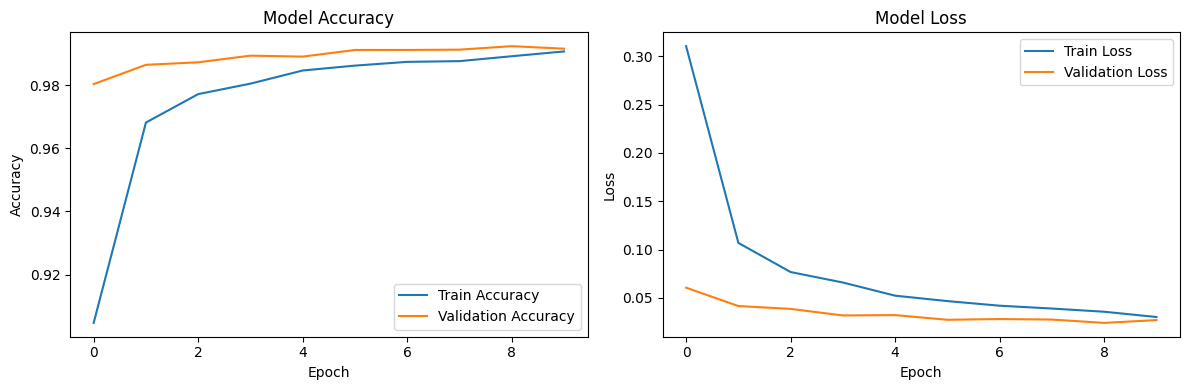

In [13]:
loss, accuracy = model.evaluate(X_test_mnist, y_test_mnist_cat, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%") # Target > 95%

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


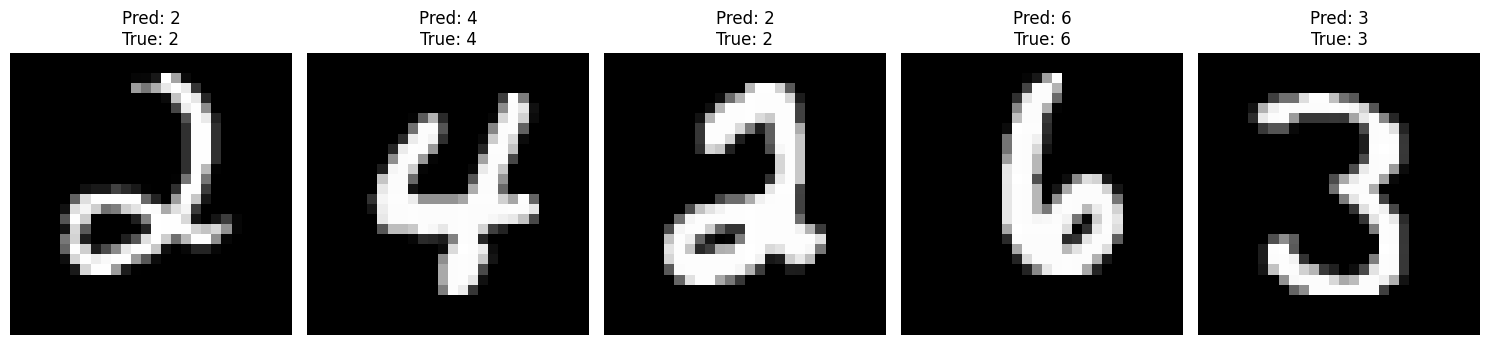

In [14]:
# Make predictions on the test set
predictions = model.predict(X_test_mnist)
predicted_labels = np.argmax(predictions, axis=1) # Get the digit with highest probability

# Select 5 random samples to display
num_samples_to_show = 5
random_indices = np.random.choice(X_test_mnist.shape[0], num_samples_to_show, replace=False)

plt.figure(figsize=(15, 5))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_samples_to_show, i + 1)
    # Reshape from (28,28,1) to (28,28) for imshow
    plt.imshow(X_test_mnist[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[index]}\nTrue: {y_test_mnist[index]}") # y_test_mnist has original integer labels
    plt.axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Save the model to a file in your Colab environment's temporary storage
model_filename = 'mnist_cnn_model.h5'
model.save(model_filename)
print(f"Model saved as {model_filename}")

# You can find this file in the Colab file browser (folder icon on the left panel).
# You can download it from there if you plan to run the Streamlit app locally.

Model saved as mnist_cnn_model.h5


In [16]:
!pip install -U spacy spacytextblob
!python -m spacy download en_core_web_sm

print("spaCy, SpacyTextBlob, and 'en_core_web_sm' model installed/updated.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.6
    Uninstalling spacy-3.8.6:
      Successfully uninstalled spacy-3.8.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 99.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
spaCy, SpacyTextBlob, and 'en_core_web_sm' model installed/updated.


In [17]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob # For rule-based sentiment

# Load the spaCy model
# If you encounter an error here after installation, try Runtime -> Restart runtime
try:
    nlp = spacy.load('en_core_web_sm')
    # Add the SpacyTextBlob component to the NLP pipeline
    if 'spacytextblob' not in nlp.pipe_names:
      nlp.add_pipe('spacytextblob')
    print("spaCy 'en_core_web_sm' model loaded successfully with SpacyTextBlob.")
except OSError:
    print("Error loading spaCy model. Ensure it's downloaded and try restarting the runtime (Runtime -> Restart runtime).")
    print("Then re-run the '!python -m spacy download en_core_web_sm' cell if needed.")

spaCy 'en_core_web_sm' model loaded successfully with SpacyTextBlob.


In [18]:
amazon_reviews = [
    "The new Sony WH-1000XM5 headphones are amazing! Best noise cancellation I've ever experienced from Bose or Apple.",
    "This generic BrandX phone charger broke after one week. Terrible product, do not buy.",
    "I love my Samsung Galaxy S23. The camera is fantastic, and the battery life is great. Highly recommend!",
    "The Anker PowerCore III is a reliable power bank, but the charging cable it came with feels a bit flimsy.",
    "Not happy with the FitBit Charge 5. The screen is too small and it often fails to sync with my iPhone."
]
print(f"{len(amazon_reviews)} sample reviews defined.")

5 sample reviews defined.


In [19]:
if 'nlp' not in globals():
    print("NLP model not loaded. Please run the cell that loads 'spacy.load('en_core_web_sm')' first.")
else:
    for i, review_text in enumerate(amazon_reviews):
        print(f"\n--- Review {i+1} ---")
        print(f"Text: {review_text}")

        # Process the text with spaCy
        doc = nlp(review_text)

        # 1. Named Entity Recognition (NER)
        print("\nNamed Entities (ORG or PRODUCT focus):")
        found_relevant_entities = False
        for ent in doc.ents:
            # We are particularly interested in ORG (brands) and PRODUCT
            # The 'en_core_web_sm' model might not always perfectly identify these.
            if ent.label_ in ["ORG", "PRODUCT"]:
                print(f"- Entity: '{ent.text}', Label: {ent.label_}")
                found_relevant_entities = True
            # You can print other entities too if you want to see what spaCy finds
            # else:
            #    print(f"- Other Entity: '{ent.text}', Label: {ent.label_}")

        if not found_relevant_entities:
            print("No specific ORG/PRODUCT entities found by the 'sm' model. General entities might exist.")
            # Optional: print all entities if no ORG/PRODUCT found
            # for ent in doc.ents:
            #     print(f"- General Entity: '{ent.text}', Label: {ent.label_}")


        # 2. Sentiment Analysis using SpacyTextBlob (Rule-based)
        # Polarity: a float within the range [-1.0, 1.0]
        # Subjectivity: a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
        polarity = doc._.blob.polarity
        subjectivity = doc._.blob.subjectivity

        sentiment_label = "Positive" if polarity > 0.1 else "Negative" if polarity < -0.1 else "Neutral"

        print(f"\nSentiment (SpacyTextBlob):")
        print(f"  Label: {sentiment_label}")
        print(f"  Polarity Score: {polarity:.2f} (Negative <-> Positive)")
        print(f"  Subjectivity Score: {subjectivity:.2f} (Objective <-> Subjective)")
        print("-" * 20)


--- Review 1 ---
Text: The new Sony WH-1000XM5 headphones are amazing! Best noise cancellation I've ever experienced from Bose or Apple.

Named Entities (ORG or PRODUCT focus):
- Entity: 'Sony', Label: ORG
- Entity: 'Apple', Label: ORG

Sentiment (SpacyTextBlob):
  Label: Positive
  Polarity Score: 0.67 (Negative <-> Positive)
  Subjectivity Score: 0.64 (Objective <-> Subjective)
--------------------

--- Review 2 ---
Text: This generic BrandX phone charger broke after one week. Terrible product, do not buy.

Named Entities (ORG or PRODUCT focus):
No specific ORG/PRODUCT entities found by the 'sm' model. General entities might exist.

Sentiment (SpacyTextBlob):
  Label: Negative
  Polarity Score: -0.50 (Negative <-> Positive)
  Subjectivity Score: 0.50 (Objective <-> Subjective)
--------------------

--- Review 3 ---
Text: I love my Samsung Galaxy S23. The camera is fantastic, and the battery life is great. Highly recommend!

Named Entities (ORG or PRODUCT focus):
- Entity: 'Samsung G

In [20]:
# BUGGY CODE FOR MNIST - DO NOT RUN AS IS FOR FINAL MODEL
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense # Missing Flatten
# from tensorflow.keras.utils import to_categorical # Not used, labels not one-hot

print("Buggy code cell loaded.")

# 1. Load Data (Assume already loaded and normalized as X_train_mnist, y_train_mnist etc. from Task 2)
# For standalone running, uncomment and adapt:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train = X_train.astype('float32') / 255.0
# X_test = X_test.astype('float32') / 255.0

# BUG 1: Missing reshape for CNN input (expects 4D tensor)
# X_train_buggy = X_train_mnist_original_shape # This variable doesn't exist, use X_train_mnist before reshape
# X_test_buggy = X_test_mnist_original_shape

# Use the already preprocessed data if available, or re-load and minimally process for this example
if 'X_train_mnist' not in globals(): # if Task 2 cells weren't run
    (X_train_buggy, y_train_buggy), (X_test_buggy, y_test_buggy) = mnist.load_data()
    X_train_buggy = X_train_buggy.astype('float32') / 255.0
    X_test_buggy = X_test_buggy.astype('float32') / 255.0
    # BUG 1 will manifest if we don't reshape to 4D
else: # if Task 2 cells were run, use the unreshaped versions for demo if possible, or reshaped for quick test
    # To demonstrate BUG 1, ideally we'd use the (60000, 28, 28) shape.
    # If using X_train_mnist (which is already 4D), BUG 1 won't show, but other bugs will.
    # Let's assume we're starting 'fresh' for the buggy script for clarity of BUG 1.
    (X_train_buggy_orig_shape, y_train_buggy_int), (_, _) = mnist.load_data()
    X_train_buggy_reshaped = X_train_buggy_orig_shape.astype('float32') / 255.0
    # X_train_buggy_reshaped = X_train_buggy_reshaped.reshape((-1, 28, 28, 1)) # This is the FIX for BUG 1

# BUG 2: Labels not one-hot encoded for categorical_crossentropy if that's the intended loss
# y_train_buggy_cat = to_categorical(y_train_buggy_int, num_classes=10) # This is the FIX for BUG 2


# 2. Build Buggy CNN Model
buggy_model = Sequential([
    # If X_train_buggy_reshaped is NOT used, input_shape should be (28,28) and this will fail later,
    # or if it is used as (28,28,1) for input_shape, then BUG 1 is implicitly fixed for the model definition
    # but the data passed to fit() might be wrong.
    # Let's assume input_shape is (28,28,1) for the Conv2D but data is not reshaped.
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    # BUG 3: Missing Flatten layer before Dense layer
    Dense(100, activation='relu'),
    # BUG 4: Output layer has 10 units, but activation is 'sigmoid' for multi-class. Should be 'softmax'.
    Dense(10, activation='sigmoid')
])

# 3. Compile Buggy Model
# BUG 5: Loss function 'binary_crossentropy' for multi-class (10 classes).
buggy_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

buggy_model.summary()

# 4. Attempt to Train Buggy Model (This will likely throw errors or perform very poorly)
print("\nAttempting to train the BUGGY model (expect errors or poor performance):")
# This will fail if X_train_buggy_reshaped is not used (due to BUG 1 - dimension mismatch)
# and y_train_buggy_int is used with binary_crossentropy (BUG 2 & 5).
try:
    # To make it run and show other errors, let's use the reshaped data but keep other bugs
    X_temp_train = X_train_buggy_orig_shape.astype('float32') / 255.0
    X_temp_train = X_temp_train.reshape((-1, 28, 28, 1)) # Fix BUG 1 for training attempt

    history_buggy = buggy_model.fit(
        X_temp_train,
        y_train_buggy_int, # Using integer labels (BUG 2 for categorical, BUG 5 for binary_crossentropy)
        epochs=1,
        batch_size=32,
        validation_split=0.1 # Using a small split for quick test
    )
    print("Buggy model training 'completed' (likely with issues).")
except Exception as e:
    print(f"Error during buggy model training: {e}")
    print("This error is expected due to the bugs in the code.")

Buggy code cell loaded.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13, 13, 100)    │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 13, 13, 10)     │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,630 (18.09 KB)

 Trainable params: 4,630 (18.09 KB)

 Non-trainable params: 0 (0.00 B)


Attempting to train the BUGGY model (expect errors or poor performance):
Error during buggy model training: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 13, 13, 10)
This error is expected due to the bugs in the code.
